In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
adult_df=pd.read_csv('C:/Users/aksha/Desktop/ai/datasets/adult_census_income.csv')
adult_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [3]:
adult_df.shape

(32561, 15)

In [4]:
adult_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
adult_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
pd.unique(adult_df['income'])

array(['<=50K', '>50K'], dtype=object)

In [7]:
#We need to replace the incomes with an integer that denotes its class
adult_df['income']=np.where(adult_df['income']=='>50K',1,0)

In [8]:
#Define a function to visualize how different columns coorealate with the income
def hist_by(df,column):
    X,y=[],[]
    for value in sorted(df[column].unique()):
        X.append(value)
        y.append(df[df[column]==value]['income'].mean()*100.0)
        
    index=np.arange(len(X))
    width=0.35
    plt.bar(index,y,width)
    plt.xticks(index+width/2,X,rotation=70)
    plt.yticks(np.arange(0,100,10))
    plt.ylim(0,100)
    plt.xlabel(column)
    plt.ylabel('Percentage of people whose income is above $50k')
    plt.tight_layout()
    plt.show()

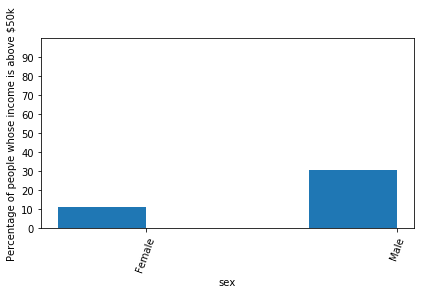

In [9]:
#Visualize how the sex correaltes with the income
hist_by(adult_df,'sex')

According to the data only 10% of the women have income above 50k while only 30% of kmen have income above 50k

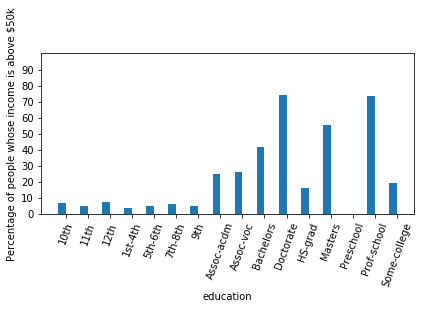

In [10]:
#Visualize how the education correaltes with the income
hist_by(adult_df,'education')

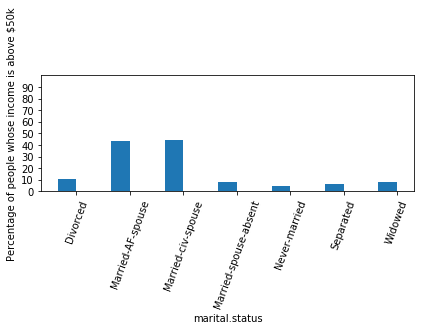

In [11]:
#Visualize how the marital status correaltes with income
hist_by(adult_df,'marital.status')

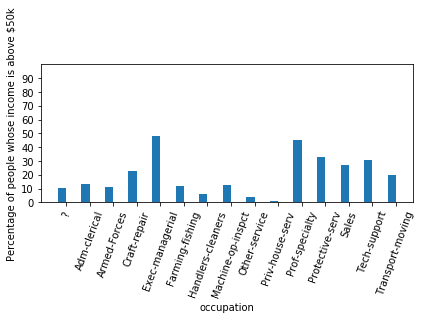

In [12]:
#Visualize how the occupation correaltes with income
hist_by(adult_df,'occupation')

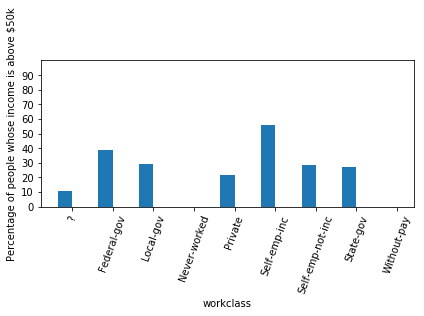

In [13]:
#Visualize how the workclass correaltes with income
hist_by(adult_df,'workclass')

In [14]:
# Get rid of entries where the occupation occupation or workclass is unknown
adult_df=adult_df[adult_df['occupation']!='?']
adult_df=adult_df[adult_df['workclass']!='?']

In [15]:
#Get the dummies for the columns.this is the same as LabelBinarizer is sklearn
education_dummies=pd.get_dummies(adult_df['education'])
marital_dummies=pd.get_dummies(adult_df['marital.status'])
relationship_dummies=pd.get_dummies(adult_df['relationship'])
sex_dummies=pd.get_dummies(adult_df['sex'])
occupation_dummies=pd.get_dummies(adult_df['occupation'])
native_dummies=pd.get_dummies(adult_df['native.country'])
race_dummies=pd.get_dummies(adult_df['race'])
workclass_dummies=pd.get_dummies(adult_df['workclass'])

In [16]:
#Example for marital status
marital_dummies.head()

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0
6,0,0,0,0,0,1,0


In [40]:
#Define a function to put he continuous values in bins

def into_bins(columns,bins):
    group_names=list(ascii_uppercase[:len(bins)-1])
    binned=pd.cut(columns,bins,labels=group_names)
    return binned

In [41]:
#Lets see how the capital loss varies
adult_df['capital.loss'].describe()

count    30718.000000
mean        88.910216
std        405.657203
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital.loss, dtype: float64

C:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


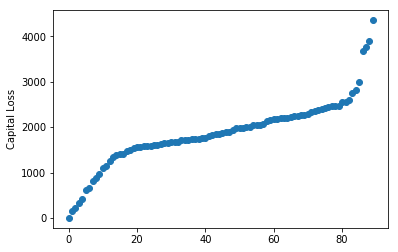

In [42]:
#Create the scatter plot of all the unique values in capital.loss
#this will be helpful in visualizing how to assign bins to feature
unique=sorted(adult_df['capital.loss'].unique())
plt.scatter(range(len(unique)),unique)
plt.ylabel('Capital Loss')
plt.tick_params(axis='x',which='bopth',labelbottom='off',bottom='off')#disable x ticks
plt.show()

In [43]:
#Create bins from -1 to 4500 with 500 values of each bin
from string import ascii_lowercase
from string import ascii_uppercase
loss_bins=into_bins(adult_df['capital.loss'],list(range(-1,4500,500)))
loss_dummies=pd.get_dummies(loss_bins)
print(loss_bins)

1        I
3        H
4        H
5        H
6        H
7        H
8        H
9        G
10       G
11       F
12       F
13       F
15       F
16       F
17       F
18       F
19       F
20       F
21       F
22       F
23       F
25       F
26       F
27       F
28       F
29       F
30       F
31       F
32       F
33       F
        ..
32525    A
32526    A
32527    A
32529    A
32530    A
32531    A
32532    A
32535    A
32536    A
32537    A
32538    A
32539    A
32540    A
32542    A
32545    A
32546    A
32547    A
32548    A
32549    A
32550    A
32551    A
32552    A
32553    A
32554    A
32555    A
32556    A
32557    A
32558    A
32559    A
32560    A
Name: capital.loss, Length: 30718, dtype: category
Categories (9, object): [A < B < C < D ... F < G < H < I]


In [44]:
#Create bins from -1 to 42000, with 5000 values in each bin. add an extra outlier
gain_bins=into_bins(adult_df['capital.gain'],list(range(-1,42000,5000))+[100000])
gain_dummies=pd.get_dummies(gain_bins)

In [45]:
from sklearn.model_selection import train_test_split
#concatenat all the cols and we need the ones to be generated by binning and creating dummies
X=pd.concat([adult_df[['age','hours.per.week']],gain_dummies,occupation_dummies,workclass_dummies,education_dummies,marital_dummies,race_dummies,sex_dummies],axis=1)
y=adult_df['income']
#Create test and train sets
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9,random_state=1)

C:\Users\aksha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [47]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
#Create a classifer and fit the data
clf=AdaBoostClassifier(random_state=1)
clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=1)

In [49]:
#Find accuracy using test set
y_pred=clf.predict(X_test)
print('Accuracy:{}'.format(accuracy_score(y_pred,y_test)))

Accuracy:0.8414713541666666


In [50]:
print(y_test)

3314     1
19677    1
29448    1
3581     0
25490    0
31893    0
6982     0
31258    0
5060     0
8729     0
8039     0
3632     0
24552    1
21175    1
19577    1
21515    0
1831     1
10101    1
24222    0
16863    1
25386    0
11197    0
16401    0
9363     0
5485     1
28578    0
21393    0
4353     0
618      1
29303    1
        ..
24237    1
2147     1
6838     1
4775     0
7120     0
8402     0
27598    0
17626    1
13579    1
11408    1
15822    0
31162    0
30839    0
12494    1
17215    1
7859     0
7430     0
12661    0
901      0
4035     0
25164    0
7548     0
17048    0
16327    0
29386    0
25609    1
12811    0
2015     1
28996    0
32486    1
Name: income, Length: 3072, dtype: int32


# Confusion matrix

In [52]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

In [53]:
print('confusion_matrix:',confusion_matrix(y_test,y_pred),sep='\n')


confusion_matrix:
[[2111  188]
 [ 299  474]]


In [54]:
print('classification report:',classification_report(y_test,y_pred))

classification report:               precision    recall  f1-score   support

           0       0.88      0.92      0.90      2299
           1       0.72      0.61      0.66       773

   micro avg       0.84      0.84      0.84      3072
   macro avg       0.80      0.77      0.78      3072
weighted avg       0.84      0.84      0.84      3072



In [55]:
from sklearn.metrics import accuracy_score
print('accuracy score:',accuracy_score(y_test,y_pred))

accuracy score: 0.8414713541666666
